<a href="https://colab.research.google.com/github/Elinasu001/Data-Analysis-with-Open-Source/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 - 서울시 열린데이터광장 데이터 분석


## 문제 1-2. API 호출, 2015년 1월부터 2024년 12월까지의 개인 유형의 형년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집하는 프로그램 작성

### 1-2) API 호출

In [ ]:
import requests

api_key = "52726d4a68656c6937327048787854"
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/"

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

response = requests.get(base_url)

if response.status_code == 200:
    print("api 호출 성공")
    print(response.json())
else:
    print(f"API 호출 실패 : {response.status_code}")

api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 1241, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2025', 'MON': '06', 'MM_TYPE': '개인', 'CNT': '1269454', 'EUS': '278745288', 'EUS1': '275851011', 'EUS2': '273151435', 'ECO2_1': '4244065', 'ECO2_2': '2076623.656', 'GUS': '13084768', 'GUS1': '11889039', 'GUS2': '12094650', 'GCO2_1': '1091102', 'GCO2_2': '2182204', 'WUS': '14927683.6', 'WUS1': '15166284.8', 'WUS2': '15371662.2', 'WCO2_1': '-341289.9', 'WCO2_2': '-611822.446', 'HUS': '379182.22', 'HUS1': '368839.049', 'HUS2': '389847.167', 'HCO2_1': '-160.888', 'HCO2_2': '-22448.67848156', 'REG_DATE': '2025-09-01 04:02:15.0'}, {'YEAR': '2025', 'MON': '06', 'MM_TYPE': '학교', 'CNT': '6745', 'EUS': '117808793', 'EUS1': '114793127', 'EUS2': '114623246', 'ECO2_1': '3100606.5', 'ECO2_2': '3096973.668', 'GUS': '2093441', 'GUS1': '2046804', 'GUS2': '2061648', 'GCO2_1': '39207', 'GCO2_2': '78414', 'WUS': '1824338.2', 'WUS1': '1914804.2', 'WUS2': '1956560.2', '

### 1-2) API 호출, 2015년 1월부터 2024년 12월까지의 개인 유형의 형년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집하는 프로그램 작성

In [ ]:
import requests
import json

api_key = "52726d4a68656c6937327048787854"

# 데이터를 담을 리스트
data_list = []

for year in range(2015, 2025):  # 2015~2024
    for month in range(1, 13):  # 1~12월
        month_str = f"{month:02d}"
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{month_str}"

        try:
            # 데이터 수집
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # API 호출 성공 확인 및 데이터 저장
            if 'energyUseDataSummaryInfo' in data and data['energyUseDataSummaryInfo']['RESULT']['CODE'] == 'INFO-000':
                item_list = data['energyUseDataSummaryInfo'].get('row')
                # 'row' 리스트에 데이터가 있는지 확인
                if item_list:
                    data_list.extend(item_list)
                else:
                    print(f"[{year}년 {month_str}월] 데이터 없음")
            else:
                print(f"[{year}년 {month_str}월] API 호출 실패: {data['energyUseDataSummaryInfo']['RESULT']['MESSAGE']}")

        except requests.exceptions.RequestException as e:
            print(f"{year}년 {month_str}월 API 호출 실패: {e}")
        except json.JSONDecodeError as e:
            print(f"{year}년 {month_str}월 JSON 파싱 실패: {e}")

# 수집된 데이터 확인
print("수집된 총 데이터 개수:", len(data_list))
if len(data_list) > 0:
    print("첫 번째 데이터:", data_list[0])


수집된 총 데이터 개수: 600
첫 번째 데이터: {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}


## 문제 2. 데이터 변환 및 전처리


### 2-1) 수집한 json 현태의 데이터를 pandas DataFrame 변환, 데이터 기본 정보 출력

In [ ]:
import requests
import json
import pandas as pd   # pandas 추가

api_key = "52726d4a68656c6937327048787854"

# 데이터를 담을 리스트
data_list = []

for year in range(2015, 2025):  # 2015~2024
    for month in range(1, 13):  # 1~12월
        month_str = f"{month:02d}"
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{month_str}"

        try:
            # 데이터 수집
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # API 호출 성공 확인 및 데이터 저장
            if 'energyUseDataSummaryInfo' in data and data['energyUseDataSummaryInfo']['RESULT']['CODE'] == 'INFO-000':
                item_list = data['energyUseDataSummaryInfo'].get('row')
                # 'row' 리스트에 데이터가 있는지 확인
                if item_list:
                    data_list.extend(item_list)
                else:
                    print(f"[{year}년 {month_str}월] 데이터 없음")
            else:
                print(f"[{year}년 {month_str}월] API 호출 실패: {data['energyUseDataSummaryInfo']['RESULT']['MESSAGE']}")

        except requests.exceptions.RequestException as e:
            print(f"{year}년 {month_str}월 API 호출 실패: {e}")
        except json.JSONDecodeError as e:
            print(f"{year}년 {month_str}월 JSON 파싱 실패: {e}")

# 수집된 데이터 확인
print("수집된 총 데이터 개수:", len(data_list))
if len(data_list) > 0:
    print("첫 번째 데이터:", data_list[0])


# 2-1. JSON 형태의 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data_list)

# 데이터프레임의 기본 정보 출력
print("### 2-1. 데이터프레임 기본 정보 ###")
print(df.info())
print("\n")
print("### 데이터프레임 상위 5개 행 ###")
print(df.head())

수집된 총 데이터 개수: 600
첫 번째 데이터: {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
### 2-1. 데이터프레임 기본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      600 non-null    object
 1   MON       600 non-null    object
 2   MM_TYPE   600 non-null    object
 3   CNT       600 non-null    object
 4   EUS       600 non-null    object
 5   EUS1     

### 2-2) 연도별, 계절별 분석을 위해 날짜 컬럼 활용하여 연도(year)와 계절(season) 컬럼을 추가하는 전처리 코드를 작성 * 계절 구분 : 봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import requests
import json
import pandas as pd   # pandas 추가
import matplotlib.pyplot as plt


# Colab에서 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

api_key = "52726d4a68656c6937327048787854"
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/"

# 데이터를 담을 리스트
data_list = []

for year in range(2015, 2025):  # 2015~2024
    for month in range(1, 13):  # 1~12월
        month_str = f"{month:02d}"
        url = f"{base_url}/{year}/{month_str}"

        try:
            # 데이터 수집
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # API 호출 성공 확인 및 데이터 저장
            if 'energyUseDataSummaryInfo' in data and data['energyUseDataSummaryInfo']['RESULT']['CODE'] == 'INFO-000':
                item_list = data['energyUseDataSummaryInfo'].get('row')
                # 'row' 리스트에 데이터가 있는지 확인
                if item_list:
                    data_list.extend(item_list)
                else:
                    print(f"[{year}년 {month_str}월] 데이터 없음")
            else:
                print(f"[{year}년 {month_str}월] API 호출 실패: {data['energyUseDataSummaryInfo']['RESULT']['MESSAGE']}")

        except requests.exceptions.RequestException as e:
            print(f"{year}년 {month_str}월 API 호출 실패: {e}")
        except json.JSONDecodeError as e:
            print(f"{year}년 {month_str}월 JSON 파싱 실패: {e}")

# 수집된 데이터 확인
print("수집된 총 데이터 개수:", len(data_list))
if len(data_list) > 0:
    print("첫 번째 데이터:", data_list[0])


# 2-1. JSON 형태의 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data_list)

# 2-1. 데이터프레임의 기본 정보 출력
print("### 2-1. 데이터프레임 기본 정보 ###")
print(df.info())
print("\n")
print("### 데이터프레임 상위 5개 행 ###")
print(df.head())

# 2-2. 날짜 컬럼을 활용하여 'year'와 'season' 컬럼 추가
df['날짜'] = pd.to_datetime(df['YEAR'].astype(str) + df['MON'].astype(str).str.zfill(2), format='%Y%m')
df['year'] = df['날짜'].dt.year
month = df['날짜'].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = month.apply(get_season)

# 2-2. 변환 결과 확인
print("### 2-2. 전처리 후 데이터프레임 ###")
print(df[['YEAR', 'MON', 'year', 'season']].head(12))



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 문제 3. 데이터 시각화


In [ ]:


print (plt.rcParams['font.family'] )

In [24]:
!apt-get -qq install fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

import requests
import json
import pandas as pd   # pandas 추가
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Nanum Barun Gothic')

# Colab에서 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# ttf 폰트 전체갯수
print(len(font_list))

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumGothic' in f.name]

print (plt.rcParams['font.family'] )
print (plt.rcParams['font.size'] )


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 3-1) 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화하고, 그래프에 자신의 학번 뒤 4자리를 제목에 포함(예: "연도별 에너지 사용 총액 변화 - 1234")

2017년 03월 API 호출 실패: Expecting value: line 1 column 1 (char 0)
2022년 02월 API 호출 실패: Expecting value: line 1 column 1 (char 0)
2022년 11월 API 호출 실패: Expecting value: line 1 column 1 (char 0)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

수집된 총 데이터 개수: 585
첫 번째 데이터: {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
### 2-1. 데이터프레임 기본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      585 non-null    object
 1   MON       585 non-null    object
 2   MM_TYPE   585 non-null    object
 3   CNT       585 non-null    object
 4   EUS       585 non-null    object
 5   EUS1     

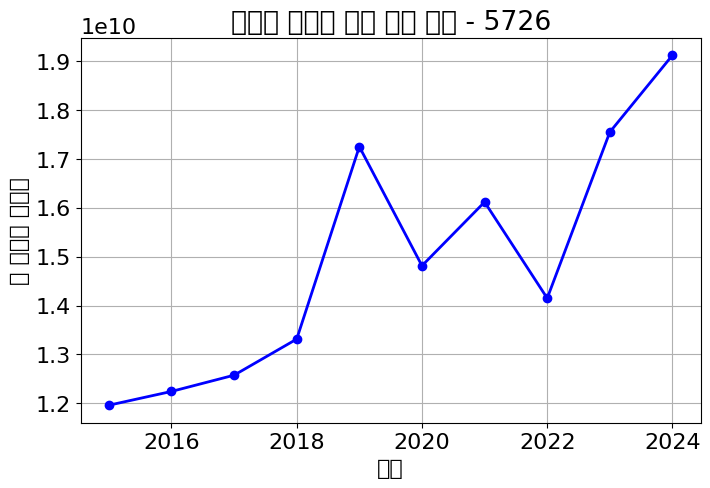

In [22]:
!apt-get -qq install fonts-nanum

import requests
import json
import pandas as pd   # pandas 추가
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (14,4)


api_key = "52726d4a68656c6937327048787854"


# 데이터를 담을 리스트
data_list = []

for year in range(2015, 2025):  # 2015~2024
    for month in range(1, 13):  # 1~12월
        month_str = f"{month:02d}"
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{month_str}"

        try:
            # 데이터 수집
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # API 호출 성공 확인 및 데이터 저장
            if 'energyUseDataSummaryInfo' in data and data['energyUseDataSummaryInfo']['RESULT']['CODE'] == 'INFO-000':
                item_list = data['energyUseDataSummaryInfo'].get('row')
                # 'row' 리스트에 데이터가 있는지 확인
                if item_list:
                    data_list.extend(item_list)
                else:
                    print(f"[{year}년 {month_str}월] 데이터 없음")
            else:
                print(f"[{year}년 {month_str}월] API 호출 실패: {data['energyUseDataSummaryInfo']['RESULT']['MESSAGE']}")

        except requests.exceptions.RequestException as e:
            print(f"{year}년 {month_str}월 API 호출 실패: {e}")
        except json.JSONDecodeError as e:
            print(f"{year}년 {month_str}월 JSON 파싱 실패: {e}")

# 수집된 데이터 확인
print("수집된 총 데이터 개수:", len(data_list))
if len(data_list) > 0:
    print("첫 번째 데이터:", data_list[0])


# 2-1. JSON 형태의 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data_list)

# 2-1. 데이터프레임의 기본 정보 출력
print("### 2-1. 데이터프레임 기본 정보 ###")
print(df.info())
print("\n")
print("### 데이터프레임 상위 5개 행 ###")
print(df.head())

# 2-2. 날짜 컬럼을 활용하여 'year'와 'season' 컬럼 추가
df['날짜'] = pd.to_datetime(df['YEAR'].astype(str) + df['MON'].astype(str).str.zfill(2), format='%Y%m')
df['year'] = df['날짜'].dt.year
month = df['날짜'].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = month.apply(get_season)

# 2-2. 변환 결과 확인
print("### 2-2. 전처리 후 데이터프레임 ###")
print(df[['YEAR', 'MON', 'year', 'season']].head(12))

# 3-1. 연도별 에너지 사용 총량 변화를 선 그래프로 시각화
for col in ['EUS', 'GUS', 'WUS', 'HUS']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 총 에너지 사용량 계산
df['total_energy_usage'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
# 연도별 합계
yearly_total_usage = df.groupby('year')['total_energy_usage'].sum()

# 실제 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(yearly_total_usage.index, yearly_total_usage.values, marker='o', color='blue', linewidth=2)

# 그래프 제목 및 라벨 설정
your_student_id_last_4 = "5726"
plt.title(f"연도별 에너지 사용 총액 변화 - {your_student_id_last_4}")
plt.xlabel("연도")
plt.ylabel("총 에너지 사용량")
plt.grid(True)
plt.show()


### 3-2) 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시

In [21]:
!apt-get -qq install fonts-nanum

import requests
import json
import pandas as pd   # pandas 추가
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (14,4)


api_key = "52726d4a68656c6937327048787854"


# 데이터를 담을 리스트
data_list = []

for year in range(2015, 2025):  # 2015~2024
    for month in range(1, 13):  # 1~12월
        month_str = f"{month:02d}"
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{month_str}"

        try:
            # 데이터 수집
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # API 호출 성공 확인 및 데이터 저장
            if 'energyUseDataSummaryInfo' in data and data['energyUseDataSummaryInfo']['RESULT']['CODE'] == 'INFO-000':
                item_list = data['energyUseDataSummaryInfo'].get('row')
                # 'row' 리스트에 데이터가 있는지 확인
                if item_list:
                    data_list.extend(item_list)
                else:
                    print(f"[{year}년 {month_str}월] 데이터 없음")
            else:
                print(f"[{year}년 {month_str}월] API 호출 실패: {data['energyUseDataSummaryInfo']['RESULT']['MESSAGE']}")

        except requests.exceptions.RequestException as e:
            print(f"{year}년 {month_str}월 API 호출 실패: {e}")
        except json.JSONDecodeError as e:
            print(f"{year}년 {month_str}월 JSON 파싱 실패: {e}")

# 수집된 데이터 확인
print("수집된 총 데이터 개수:", len(data_list))
if len(data_list) > 0:
    print("첫 번째 데이터:", data_list[0])


# 2-1. JSON 형태의 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data_list)

# 2-1. 데이터프레임의 기본 정보 출력
print("### 2-1. 데이터프레임 기본 정보 ###")
print(df.info())
print("\n")
print("### 데이터프레임 상위 5개 행 ###")
print(df.head())

# 2-2. 날짜 컬럼을 활용하여 'year'와 'season' 컬럼 추가
df['날짜'] = pd.to_datetime(df['YEAR'].astype(str) + df['MON'].astype(str).str.zfill(2), format='%Y%m')
df['year'] = df['날짜'].dt.year
month = df['날짜'].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = month.apply(get_season)

# 2-2. 변환 결과 확인
print("### 2-2. 전처리 후 데이터프레임 ###")
print(df[['YEAR', 'MON', 'year', 'season']].head(12))

# 3-1. 연도별 에너지 사용 총량 변화를 선 그래프로 시각화
for col in ['EUS', 'GUS', 'WUS', 'HUS']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 총 에너지 사용량 계산
df['total_energy_usage'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
# 연도별 합계
yearly_total_usage = df.groupby('year')['total_energy_usage'].sum()

# 실제 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(yearly_total_usage.index, yearly_total_usage.values, marker='o', color='blue', linewidth=2)

# 그래프 제목 및 라벨 설정
your_student_id_last_4 = "5726"
plt.title(f"연도별 에너지 사용 총액 변화 - {your_student_id_last_4}")
plt.xlabel("연도")
plt.ylabel("총 에너지 사용량")
plt.grid(True)
plt.show()

# 3-2. 계절별 가스 사용량 평균을 막대 그래프로 시각화
season_order = ['봄', '여름', '가을', '겨울']
seasonal_avg_gas = df.groupby('season')['가스사용량'].mean().reindex(season_order)

plt.figure(figsize=(8, 6))
bars = plt.bar(seasonal_avg_gas.index, seasonal_avg_gas.values)

plt.title("계절별 가스 사용량 평균")
plt.xlabel("계절")
plt.ylabel("평균 가스 사용량")
plt.grid(axis='y')

# 각 막대에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.savefig("계절별_가스_사용량_평균.png")
plt.show()


2016년 11월 API 호출 실패: Expecting value: line 1 column 1 (char 0)
2017년 04월 API 호출 실패: Expecting value: line 1 column 1 (char 0)


KeyboardInterrupt: 

## 문제 4. 데이터 분석 및 해석 ( 시각화 결과를 바탕으로 다음을 분석하고 설명 )


### 4-1) 연도별 에너지 사용량 변화에서 나타나는 주요 트렌드를 찾아 분석하고, 그 원인을 추론하여 200자 이내로 설명

4. 연도별 에너지 사용량 변화 분석 및 원인 추론 (4점)
답변: 시각화한 연도별 에너지 총 사용량 변화 그래프를 바탕으로, 특정 연도나 기간에 에너지 사용량이 급격히 증가하거나 감소하는 추세를 찾을 수 있습니다. 이에 대한 원인은 사회적, 경제적, 환경적 요인 등과 연결하여 추론할 수 있습니다. 예를 들어, 특정 해에 에너지 절약 정책이 강화되었거나, 기온 변화로 인해 냉난방 사용량이 달라졌을 가능성을 제시할 수 있습니다.